### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data preparation

In [2]:
df = pd.read_csv("db/winequality-red.csv", delimiter=";")

X = df[['volatile acidity', 'density']].values.reshape(-1,2)
Y = df['quality']

### Perceptron class

In [7]:
class Perceptron:
    def __init__(self, in_size):
        self.epochs = 2000
        # initialize weigth and bias
        self.weigth = np.zeros(in_size)
        self.bias = 0
    
    def learn(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(self.x)
        
        costs = []
        for epoch in range(0, self.epochs):
            self._update_parameters()
            if epoch % 1 == 0:
                costs.append([epoch, self._cost()])
        return np.array(costs)

    def predict(self, x):
        return np.sum(x * self.weigth, axis=1) + self.bias

    def _update_parameters(self, alpha=0.05):
        del_w, del_b = self._gradient()
        self.weigth -= del_w * alpha
        self.bias -= del_b * alpha

    def _diff(self):
        yT = np.repeat(self.y, self.x.shape[1]).reshape(self.x.shape)
        return (self.weigth * self.x + self.bias) - yT

    def _cost(self):
        return np.sum(self._diff() ** 2)
    
    def _gradient(self):
        diff = self._diff()
        del_w = 1/self.n * 2 * np.sum(self.x * diff, axis=0) 
        del_b = 1/self.n * 2 * np.sum(diff)

        return del_w, del_b

### Learn

In [4]:
p = Perceptron(in_size=X.ndim)
costs = p.learn(X, Y)

### Prepare model data point for visualization

In [9]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(x.min(), x.max(), 50)
y_pred = np.linspace(y.min(), y.max(), 50)

xy = np.empty((x_pred.size + y_pred.size,), dtype=x_pred.dtype)
xy[0::2] = x_pred
xy[1::2] = y_pred
xy = xy.reshape(50, 2)

predicted = p.predict(xy)
predicted = np.expand_dims(predicted, axis=1)

### Plot

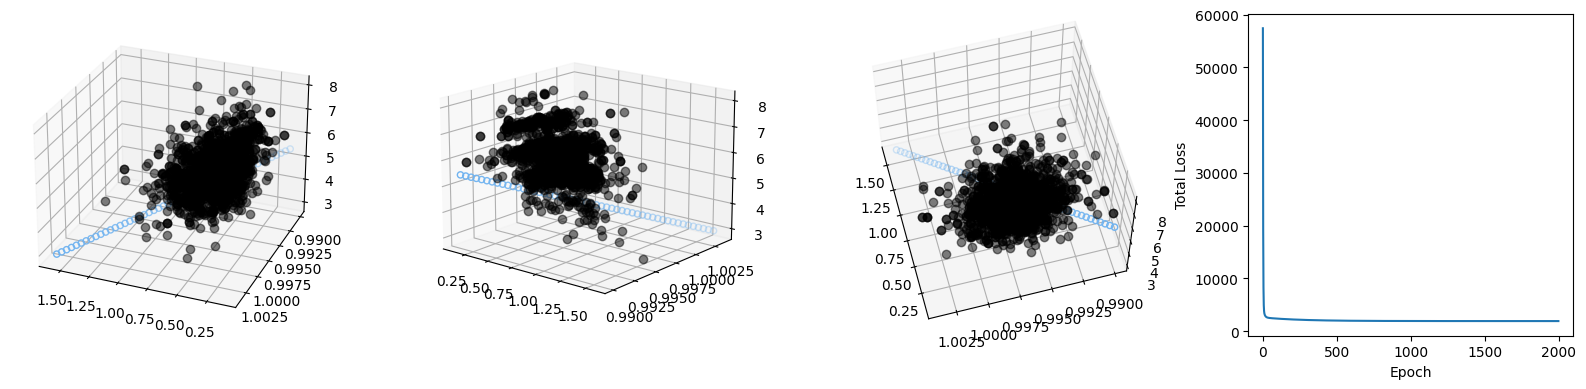

In [10]:
plt.style.use('default')

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144)
                      
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_pred, y_pred, predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

ax4.plot(costs[:, 0], costs[:, 1])
ax4.set(xlabel='Epoch', ylabel='Total Loss')

fig.tight_layout()